In [1]:
# ===========================================
# 1️⃣ LIBRERÍAS Y CONFIGURACIÓN
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)


In [2]:
# Cargar datos procesados
df = pd.read_csv(r"D:\Kevin\MCD\arhbpalr\arhbpalr\data\processed\presa_meteo.csv")

In [3]:
# ===========================================
# 2️⃣ EXPLORACIÓN INICIAL
# ===========================================
print("Dimensiones:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nValores faltantes:")
print(df.isna().sum())

print("\nResumen estadístico:")
print(df.describe().T)

# Convertir fechas
df["fecha"] = pd.to_datetime(df["fecha"])
df["time"] = pd.to_datetime(df["time"])

Dimensiones: (24631, 20)

Columnas: ['clave', 'fecha', 'almacenamiento_hm3', 'time', 'precipitation_sum', 'rain_sum', 'et0_fao_evapotranspiration', 'temperature_2m_mean', 'temperature_2m_max', 'precipitation_hours', 'wind_speed_10m_max', 'wind_speed_10m_mean', 'vapour_pressure_deficit_max', 'shortwave_radiation_sum', 'relative_humidity_2m_mean', 'cloud_cover_mean', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean']

Valores faltantes:
clave                             0
fecha                             0
almacenamiento_hm3                0
time                              0
precipitation_sum                 0
rain_sum                          0
et0_fao_evapotranspiration        0
temperature_2m_mean               0
temperature_2m_max                0
precipitation_hours               0
wind_speed_10m_max                0
wind_speed_10m_mean               0
vapour_pressure_deficit_max       0
shortwave_radi

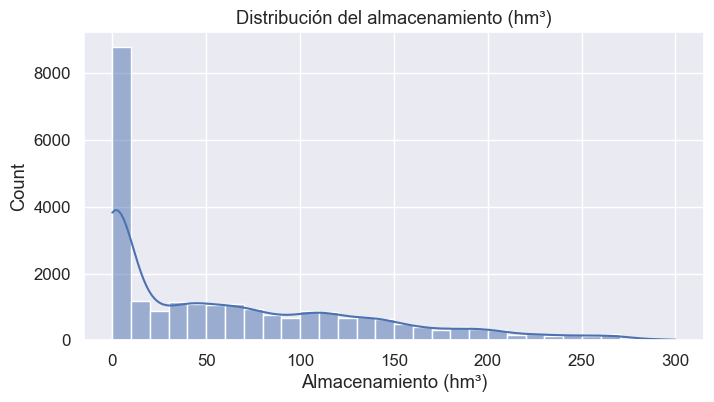


Registros con almacenamiento bajo (≤0.05 hm³): 4380


In [4]:
# ===========================================
# 3️⃣ DISTRIBUCIÓN DE ALMACENAMIENTO
# ===========================================
plt.figure(figsize=(8,4))
sns.histplot(df["almacenamiento_hm3"], bins=30, kde=True)
plt.title("Distribución del almacenamiento (hm³)")
plt.xlabel("Almacenamiento (hm³)")
plt.show()

# Identificar valores cercanos a cero
sin_agua = df[df["almacenamiento_hm3"] <= 0.05]
print(f"\nRegistros con almacenamiento bajo (≤0.05 hm³): {len(sin_agua)}")

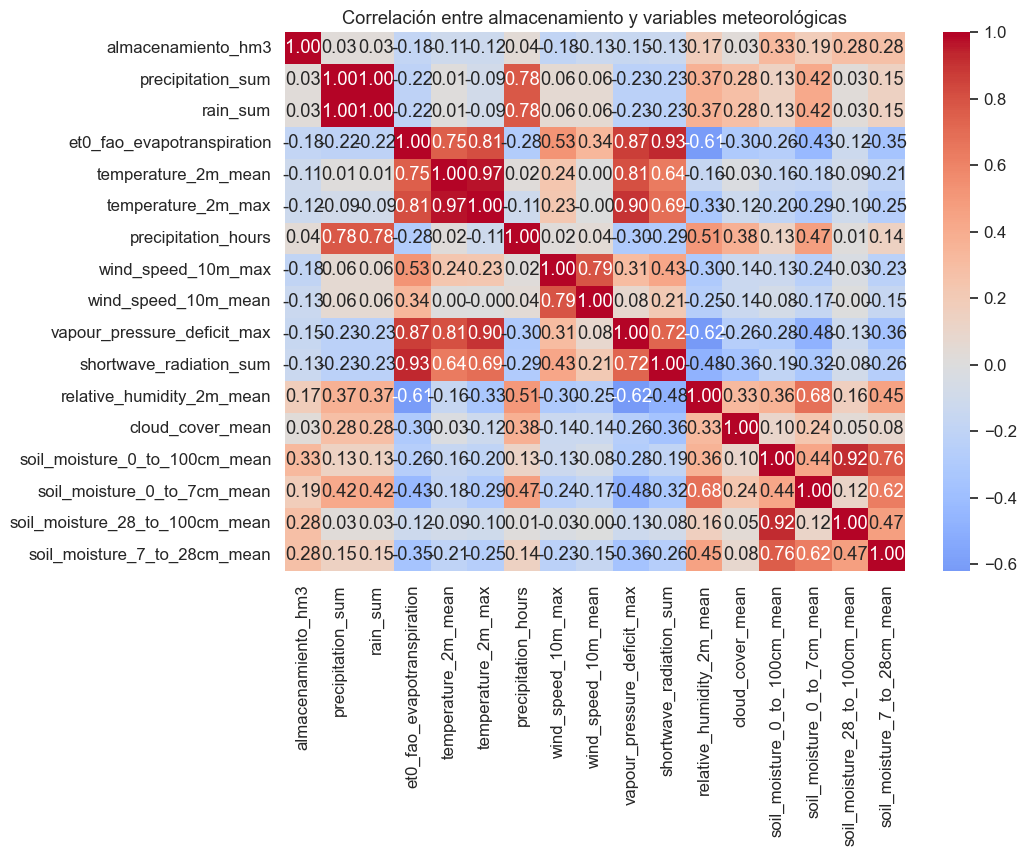

In [5]:
# ===========================================
# 4️⃣ CORRELACIONES METEOROLÓGICAS
# ===========================================
vars_meteo = [
    'precipitation_sum', 'rain_sum', 'et0_fao_evapotranspiration',
    'temperature_2m_mean', 'temperature_2m_max', 'precipitation_hours',
    'wind_speed_10m_max', 'wind_speed_10m_mean', 'vapour_pressure_deficit_max',
    'shortwave_radiation_sum', 'relative_humidity_2m_mean', 'cloud_cover_mean',
    'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean',
    'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean'
]

corr = df[['almacenamiento_hm3'] + vars_meteo].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlación entre almacenamiento y variables meteorológicas")
plt.show()


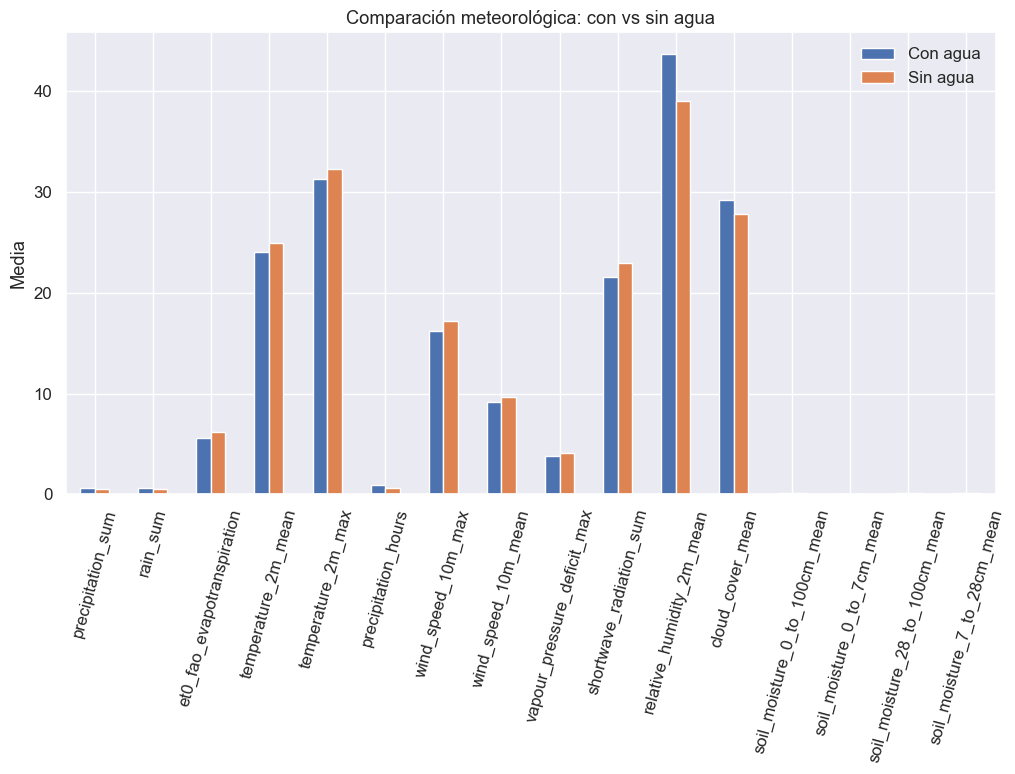

In [6]:
# ===========================================
# 5️⃣ COMPARATIVA: CON AGUA vs SIN AGUA
# ===========================================
df["sin_agua"] = (df["almacenamiento_hm3"] <= 0.05).astype(int)

# Promedio de variables según condición
promedios = df.groupby("sin_agua")[vars_meteo].mean().T
promedios.columns = ["Con agua", "Sin agua"]

promedios.plot(kind="bar", figsize=(12,6))
plt.title("Comparación meteorológica: con vs sin agua")
plt.ylabel("Media")
plt.xticks(rotation=75)
plt.show()

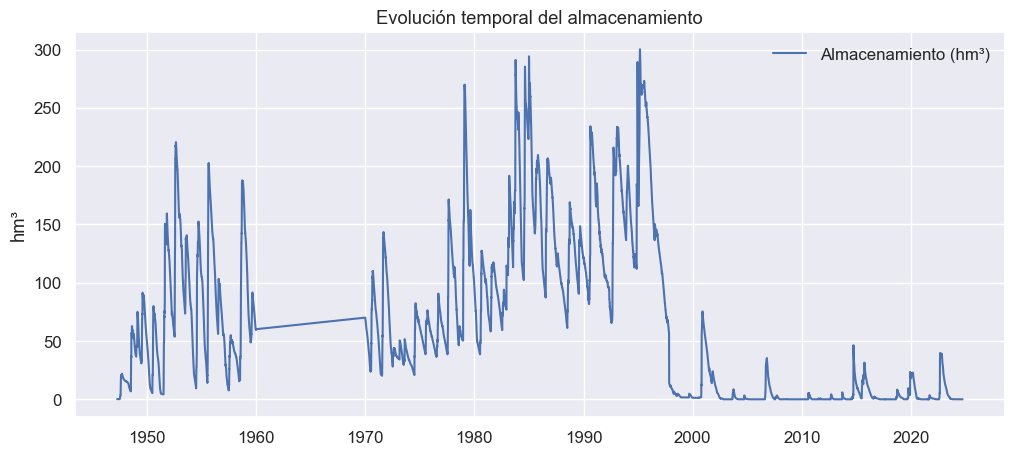

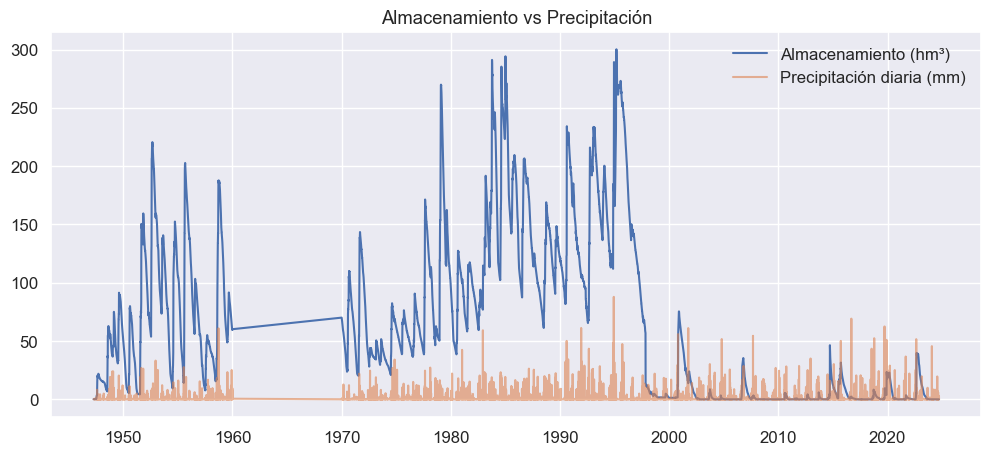

In [7]:
# ===========================================
# 6️⃣ SERIES TEMPORALES
# ===========================================
plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["almacenamiento_hm3"], label="Almacenamiento (hm³)")
plt.ylabel("hm³")
plt.title("Evolución temporal del almacenamiento")
plt.legend()
plt.show()

# Relación con precipitación
plt.figure(figsize=(12,5))
plt.plot(df["fecha"], df["almacenamiento_hm3"], label="Almacenamiento (hm³)")
plt.plot(df["fecha"], df["precipitation_sum"], label="Precipitación diaria (mm)", alpha=0.6)
plt.legend()
plt.title("Almacenamiento vs Precipitación")
plt.show()

In [8]:
# ===========================================
# 7️⃣ INTERPRETACIÓN BÁSICA
# ===========================================
print("""
✅ INTERPRETACIÓN INICIAL:
- Observa si los días con almacenamiento ≈ 0 también presentan baja humedad, alta evapotranspiración y poca precipitación.
- Si los valores de lluvia o humedad del suelo son altos mientras el sensor marca 0 hm³, podría existir un error en el sensor.
- Si la correlación con variables hidrometeorológicas (precipitación, humedad del suelo, etc.) es alta y positiva, el sensor parece coherente.
""")



✅ INTERPRETACIÓN INICIAL:
- Observa si los días con almacenamiento ≈ 0 también presentan baja humedad, alta evapotranspiración y poca precipitación.
- Si los valores de lluvia o humedad del suelo son altos mientras el sensor marca 0 hm³, podría existir un error en el sensor.
- Si la correlación con variables hidrometeorológicas (precipitación, humedad del suelo, etc.) es alta y positiva, el sensor parece coherente.



In [9]:
# Convertir fechas
df["fecha"] = pd.to_datetime(df["fecha"])
df["time"] = pd.to_datetime(df["time"])


In [10]:
# ===========================================
# 2️⃣ SELECCIÓN DE VARIABLES RELEVANTES
# ===========================================
soil_vars = [
    "soil_moisture_0_to_7cm_mean",
    "soil_moisture_7_to_28cm_mean",
    "soil_moisture_28_to_100cm_mean",
    "soil_moisture_0_to_100cm_mean"
]

# Correlación con el almacenamiento
corr_soil = df[["almacenamiento_hm3"] + soil_vars].corr().iloc[1:, 0]
print("Correlación almacenamiento vs humedad de suelo:")
print(corr_soil)

Correlación almacenamiento vs humedad de suelo:
soil_moisture_0_to_7cm_mean       0.186890
soil_moisture_7_to_28cm_mean      0.276548
soil_moisture_28_to_100cm_mean    0.281411
soil_moisture_0_to_100cm_mean     0.326870
Name: almacenamiento_hm3, dtype: float64


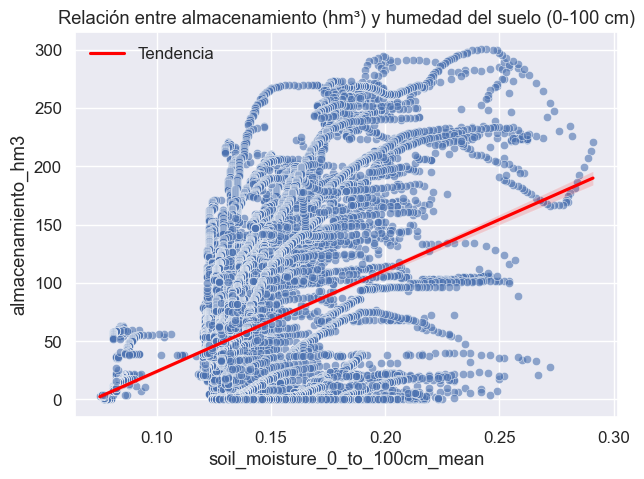

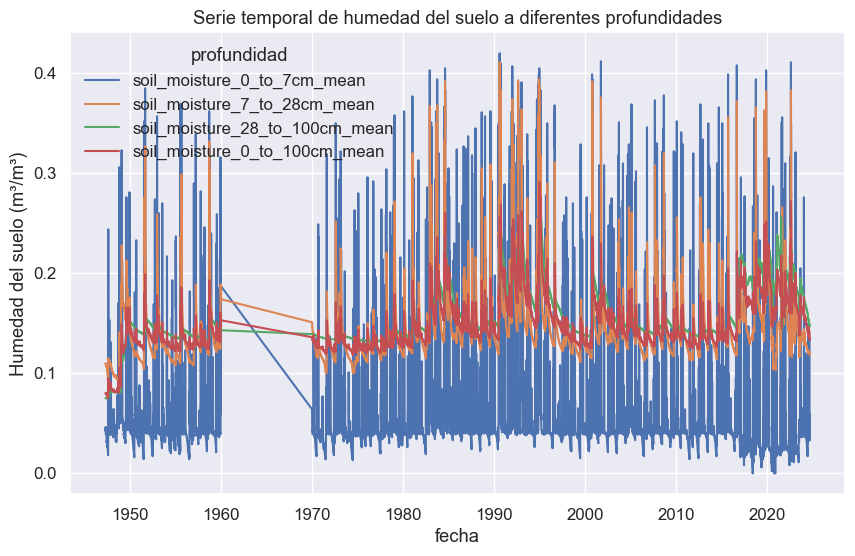

In [11]:
# ===========================================
# 3️⃣ VISUALIZACIONES
# ===========================================
# Dispersión entre almacenamiento y humedad del suelo total
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df, 
    x="soil_moisture_0_to_100cm_mean", 
    y="almacenamiento_hm3", 
    alpha=0.6
)
sns.regplot(
    data=df,
    x="soil_moisture_0_to_100cm_mean",
    y="almacenamiento_hm3",
    scatter=False,
    color="red",
    label="Tendencia"
)
plt.title("Relación entre almacenamiento (hm³) y humedad del suelo (0-100 cm)")
plt.legend()
plt.show()

# Comparar todas las profundidades
df_melt = df.melt(
    id_vars=["fecha", "almacenamiento_hm3"],
    value_vars=soil_vars,
    var_name="profundidad",
    value_name="humedad"
)

plt.figure(figsize=(10,6))
sns.lineplot(data=df_melt, x="fecha", y="humedad", hue="profundidad")
plt.title("Serie temporal de humedad del suelo a diferentes profundidades")
plt.ylabel("Humedad del suelo (m³/m³)")
plt.show()

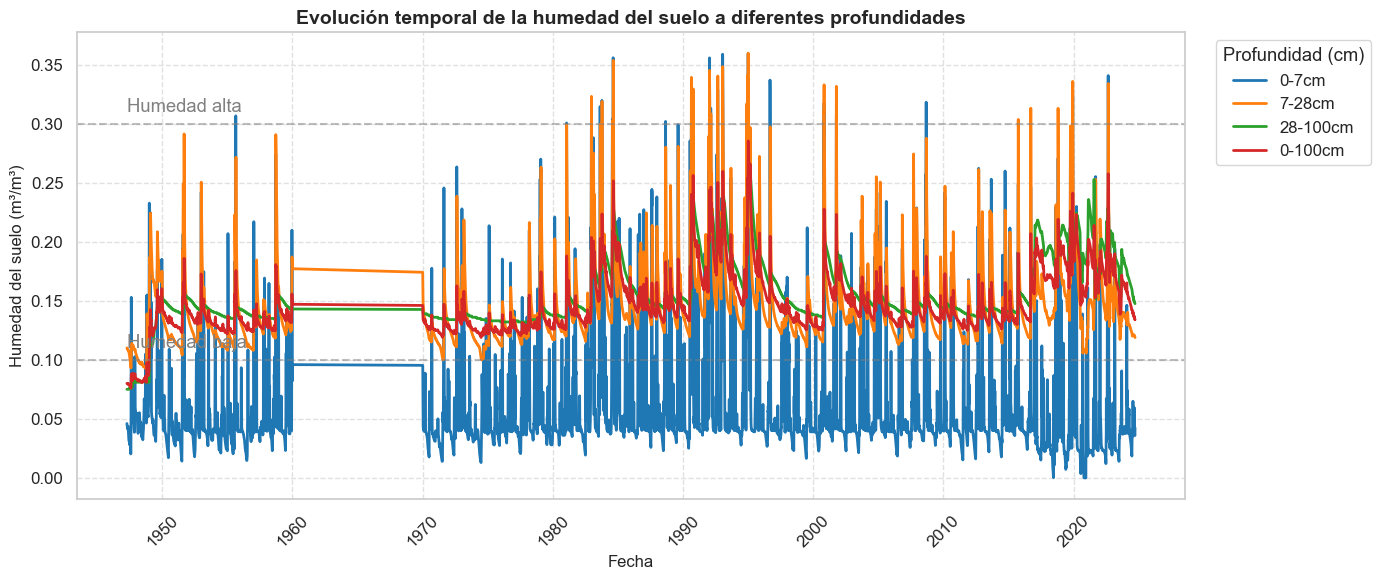

In [16]:
# Suponiendo que tu DataFrame se llama df_merged
df_plot = df.copy()
df_plot['fecha'] = pd.to_datetime(df_plot['fecha'])
df_plot = df_plot.sort_values('fecha')

# Suavizado para reducir ruido
for col in ['soil_moisture_0_to_7cm_mean', 'soil_moisture_7_to_28cm_mean',
            'soil_moisture_28_to_100cm_mean', 'soil_moisture_0_to_100cm_mean']:
    df_plot[col] = df_plot[col].rolling(window=10, min_periods=1).mean()

# Estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Colores más armónicos y distinguibles
palette = {
    'soil_moisture_0_to_7cm_mean': '#1f77b4',    # azul
    'soil_moisture_7_to_28cm_mean': '#ff7f0e',   # naranja
    'soil_moisture_28_to_100cm_mean': '#2ca02c', # verde
    'soil_moisture_0_to_100cm_mean': '#d62728'   # rojo
}

for col in palette:
    plt.plot(df_plot['fecha'], df_plot[col], label=col.replace('_mean', '').replace('soil_moisture_', '').replace('_to_', '-'), color=palette[col], linewidth=2)

# Etiquetas y formato
plt.title('Evolución temporal de la humedad del suelo a diferentes profundidades', fontsize=14, weight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Humedad del suelo (m³/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda fuera del gráfico
plt.legend(title='Profundidad (cm)', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)

# Líneas guía de referencia
plt.axhline(0.1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(0.3, color='gray', linestyle='--', alpha=0.5)
plt.text(df_plot['fecha'].min(), 0.31, 'Humedad alta', color='gray')
plt.text(df_plot['fecha'].min(), 0.11, 'Humedad baja', color='gray')

plt.tight_layout()
plt.show()

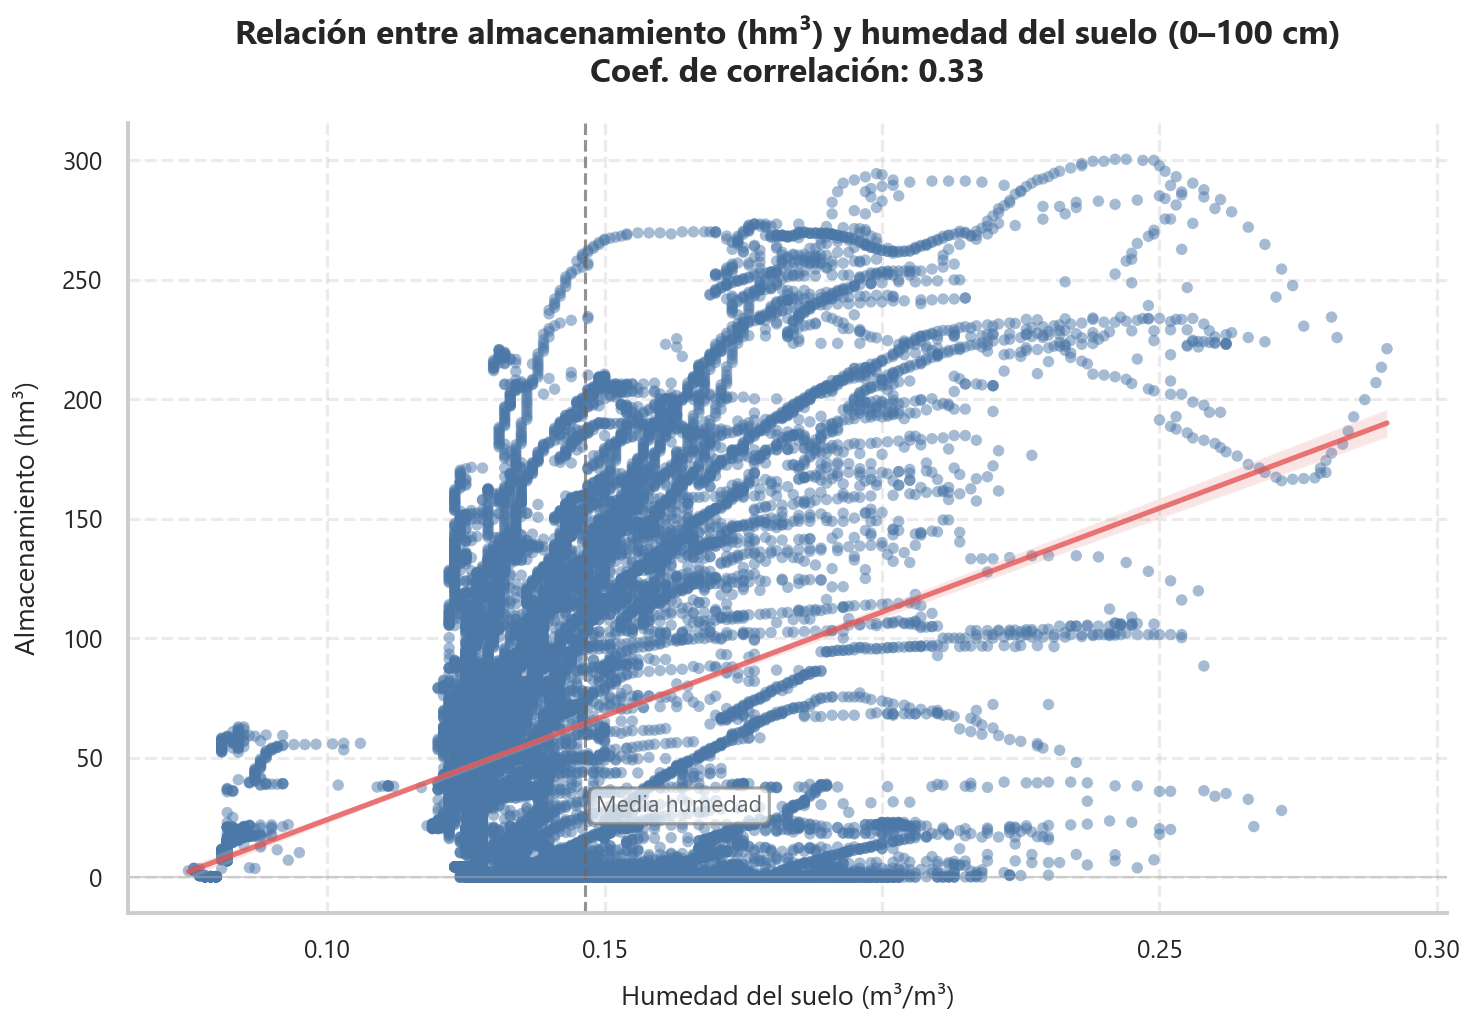

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación
corr = df['almacenamiento_hm3'].corr(df['soil_moisture_0_to_100cm_mean'])

# Estilo moderno y limpio
sns.set_style("whitegrid", {"grid.color": ".85", "grid.linestyle": "--"})
plt.rcParams.update({
    'font.family': 'Segoe UI',  # Fuente limpia y moderna
    'font.size': 12,
    'axes.labelsize': 13,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 7),
    'figure.dpi': 150,
})

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 7))

sns.regplot(
    data=df,
    x='soil_moisture_0_to_100cm_mean',
    y='almacenamiento_hm3',
    scatter_kws={
        'alpha': 0.5,
        'color': '#4c78a8',  # Azul más suave y profesional
        's': 30,
        'edgecolor': 'none'
    },
    line_kws={
        'color': '#e45756',  # Rojo más suave y moderno
        'linewidth': 2.5,
        'alpha': 0.8
    },
    ci=95,
    ax=ax
)

# Título y etiquetas
ax.set_title(
    f'Relación entre almacenamiento (hm³) y humedad del suelo (0–100 cm)\nCoef. de correlación: {corr:.2f}',
    fontsize=16, weight='bold', pad=20
)
ax.set_xlabel('Humedad del suelo (m³/m³)', fontsize=13, labelpad=10)
ax.set_ylabel('Almacenamiento (hm³)', fontsize=13, labelpad=10)

# Líneas guía
mean_soil = df['soil_moisture_0_to_100cm_mean'].mean()
ax.axvline(mean_soil, color='#666666', linestyle='--', linewidth=1.5, alpha=0.7, label='Media humedad')
ax.axhline(0, color='#aaaaaa', linewidth=1, alpha=0.5)

# Anotación de la media
ax.text(
    mean_soil + 0.002,
    ax.get_ylim()[1] * 0.08,
    'Media humedad',
    color='#666666',
    fontsize=11,
    ha='left',
    va='bottom',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.7)
)

# Personalización adicional
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

# Ajuste final
plt.tight_layout()
plt.show()


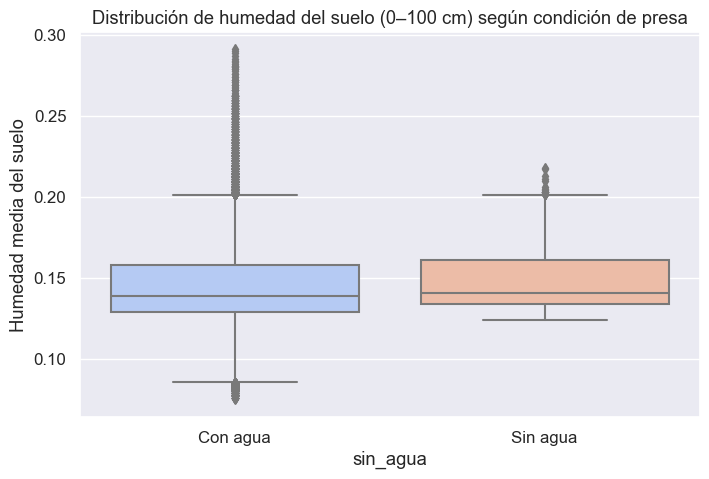


Promedio de humedad del suelo según condición:
          soil_moisture_0_to_7cm_mean  soil_moisture_7_to_28cm_mean  \
sin_agua                                                              
0                            0.064593                      0.147922   
1                            0.049189                      0.140328   

          soil_moisture_28_to_100cm_mean  soil_moisture_0_to_100cm_mean  
sin_agua                                                                 
0                               0.153585                       0.146162  
1                               0.160026                       0.148124  


In [12]:
# ===========================================
# 4️⃣ ANÁLISIS POR CONDICIÓN DE AGUA
# ===========================================
df["sin_agua"] = (df["almacenamiento_hm3"] <= 0.05).astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="sin_agua", y="soil_moisture_0_to_100cm_mean", palette="coolwarm")
plt.xticks([0,1], ["Con agua", "Sin agua"])
plt.title("Distribución de humedad del suelo (0–100 cm) según condición de presa")
plt.ylabel("Humedad media del suelo")
plt.show()

print("\nPromedio de humedad del suelo según condición:")
print(df.groupby("sin_agua")[soil_vars].mean())


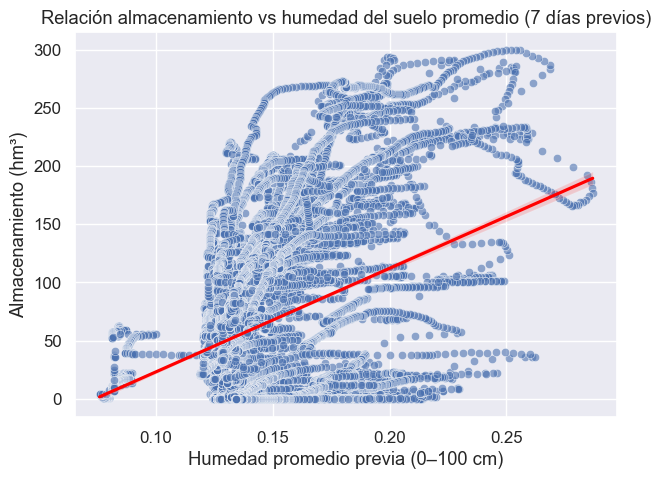

In [13]:
# ===========================================
# 5️⃣ ANÁLISIS DE RETRASO (RESPUESTA DE LA PRESA)
# ===========================================
# Efecto del suelo húmedo en días previos sobre el almacenamiento
df = df.sort_values("fecha").reset_index(drop=True)
df["humedad_prev_7d"] = df["soil_moisture_0_to_100cm_mean"].rolling(window=7).mean().shift(1)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="humedad_prev_7d",
    y="almacenamiento_hm3",
    alpha=0.6
)
sns.regplot(
    data=df,
    x="humedad_prev_7d",
    y="almacenamiento_hm3",
    scatter=False,
    color="red"
)
plt.title("Relación almacenamiento vs humedad del suelo promedio (7 días previos)")
plt.xlabel("Humedad promedio previa (0–100 cm)")
plt.ylabel("Almacenamiento (hm³)")
plt.show()


In [14]:
# ===========================================
# 6️⃣ INTERPRETACIÓN BÁSICA
# ===========================================
print("""
✅ INTERPRETACIÓN:
1. Si la correlación entre 'almacenamiento_hm3' y la humedad del suelo (0–100 cm)
   es positiva (> 0.3 o 0.4), el sensor parece coherente: cuando el suelo está húmedo, la presa almacena más.
2. Si la humedad del suelo se mantiene alta y el almacenamiento se reporta como 0,
   podría haber error o falta de calibración en el sensor.
3. Analizar la humedad superficial (0–7 cm) te indica si hubo lluvia reciente;
   la humedad profunda (28–100 cm) refleja acumulación a largo plazo.
4. Si la relación con humedad de días previos es fuerte,
   significa que la presa responde con un pequeño retraso hidrológico.
""")


✅ INTERPRETACIÓN:
1. Si la correlación entre 'almacenamiento_hm3' y la humedad del suelo (0–100 cm)
   es positiva (> 0.3 o 0.4), el sensor parece coherente: cuando el suelo está húmedo, la presa almacena más.
2. Si la humedad del suelo se mantiene alta y el almacenamiento se reporta como 0,
   podría haber error o falta de calibración en el sensor.
3. Analizar la humedad superficial (0–7 cm) te indica si hubo lluvia reciente;
   la humedad profunda (28–100 cm) refleja acumulación a largo plazo.
4. Si la relación con humedad de días previos es fuerte,
   significa que la presa responde con un pequeño retraso hidrológico.



In [22]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

p-valor normalidad (con agua): 0.0000
p-valor normalidad (sin agua): 0.0000

--- Resultado de la prueba Mann–Whitney U ---
Estadístico U: 38632355.00
p-valor: 5.8962e-41
✅ Diferencia significativa entre los grupos.


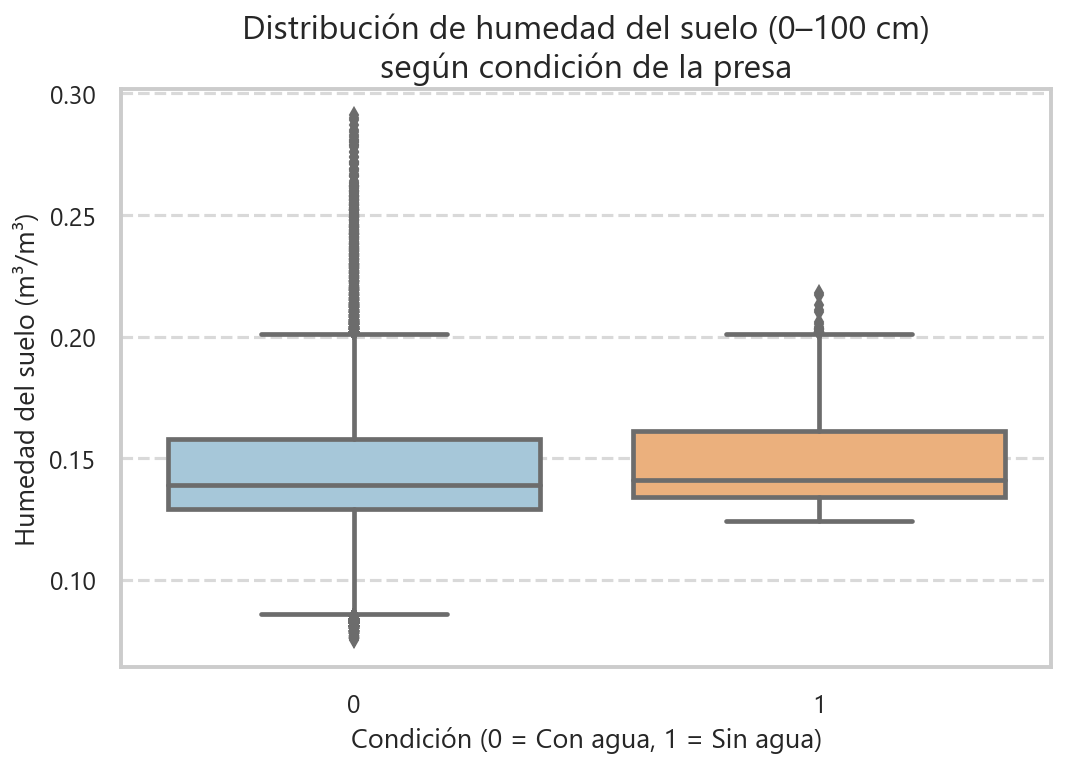

In [23]:
# Asegurar que 'sin_agua' sea categórica
df['sin_agua'] = df['sin_agua'].astype(str)

# Separar los grupos
con_agua = df[df['sin_agua'] == '0']['soil_moisture_0_to_100cm_mean'].dropna()
sin_agua = df[df['sin_agua'] == '1']['soil_moisture_0_to_100cm_mean'].dropna()

# ---- 1. Prueba de normalidad ----
stat1, p1 = stats.shapiro(con_agua.sample(500) if len(con_agua) > 500 else con_agua)
stat2, p2 = stats.shapiro(sin_agua.sample(500) if len(sin_agua) > 500 else sin_agua)
print(f"p-valor normalidad (con agua): {p1:.4f}")
print(f"p-valor normalidad (sin agua): {p2:.4f}")

# ---- 2. Prueba Mann-Whitney U ----
stat, p_value = stats.mannwhitneyu(con_agua, sin_agua, alternative='two-sided')
print("\n--- Resultado de la prueba Mann–Whitney U ---")
print(f"Estadístico U: {stat:.2f}")
print(f"p-valor: {p_value:.4e}")

if p_value < 0.05:
    print("✅ Diferencia significativa entre los grupos.")
else:
    print("❌ No hay diferencia estadísticamente significativa entre los grupos.")

# ---- 3. Visualización ----
plt.figure(figsize=(8,5))
sns.boxplot(x='sin_agua', y='soil_moisture_0_to_100cm_mean', data=df,
            palette=['#9ecae1','#fdae6b'])
plt.title("Distribución de humedad del suelo (0–100 cm)\nsegún condición de la presa")
plt.xlabel("Condición (0 = Con agua, 1 = Sin agua)")
plt.ylabel("Humedad del suelo (m³/m³)")
plt.show()


In [11]:
#pip install statsmodels

In [10]:
# ============================================
# ANÁLISIS COMPLEMENTARIO DE HUMEDAD DEL SUELO
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu, shapiro, spearmanr
import statsmodels.api as sm

In [17]:
# Crear una variable categórica de grupo (0 = sin agua, 1 = con agua)
df['grupo'] = np.where(df['almacenamiento_hm3'] <= 0.05, 'sin agua', 'con agua')


In [3]:
# ============================================
# ANÁLISIS COMPLEMENTARIO DE HUMEDAD DEL SUELO
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu, shapiro, spearmanr
import statsmodels.api as sm

# ---------------------------------------------------------------------
# 0. Creación de la variable de grupo y variable principal
# ---------------------------------------------------------------------
# Se asume que tu variable de interés es 'almacenamiento_hm3'
# y que valores ≤ 0.05 representan "sin agua"
df['grupo'] = np.where(df['almacenamiento_hm3'] <= 0.05, 'sin_agua', 'con_agua')

# Renombramos la variable principal para análisis de manera más simple
df['hm3'] = df['almacenamiento_hm3']

print("✅ Columnas clave listas:", df[['hm3', 'grupo']].head())

# ---------------------------------------------------------------------
# 1. Prueba de normalidad (Shapiro–Wilk)
# ---------------------------------------------------------------------
grupo_con = df[df['grupo'] == 'con_agua']['hm3']
grupo_sin = df[df['grupo'] == 'sin_agua']['hm3']

p_con = shapiro(grupo_con.sample(5000, random_state=1) if len(grupo_con) > 5000 else grupo_con).pvalue
p_sin = shapiro(grupo_sin.sample(5000, random_state=1) if len(grupo_sin) > 5000 else grupo_sin).pvalue

print(f"p-valor normalidad (con agua): {p_con:.4f}")
print(f"p-valor normalidad (sin agua): {p_sin:.4f}")

# ---------------------------------------------------------------------
# 2. Prueba Mann–Whitney U (comparación no paramétrica)
# ---------------------------------------------------------------------
U, p_valor = mannwhitneyu(grupo_con, grupo_sin, alternative='two-sided')

print("\n--- Resultado de la prueba Mann–Whitney U ---")
print(f"Estadístico U: {U:,.2f}")
print(f"p-valor: {p_valor:.4e}")

if p_valor < 0.05:
    print("✅ Diferencia significativa entre los grupos.")
else:
    print("❌ No se encontró diferencia significativa entre los grupos.")





✅ Columnas clave listas:     hm3     grupo
0  0.09  con_agua
1  0.11  con_agua
2  0.11  con_agua
3  0.12  con_agua
4  0.12  con_agua
p-valor normalidad (con agua): 0.0000
p-valor normalidad (sin agua): 0.0000

--- Resultado de la prueba Mann–Whitney U ---
Estadístico U: 88,699,380.00
p-valor: 0.0000e+00
✅ Diferencia significativa entre los grupos.


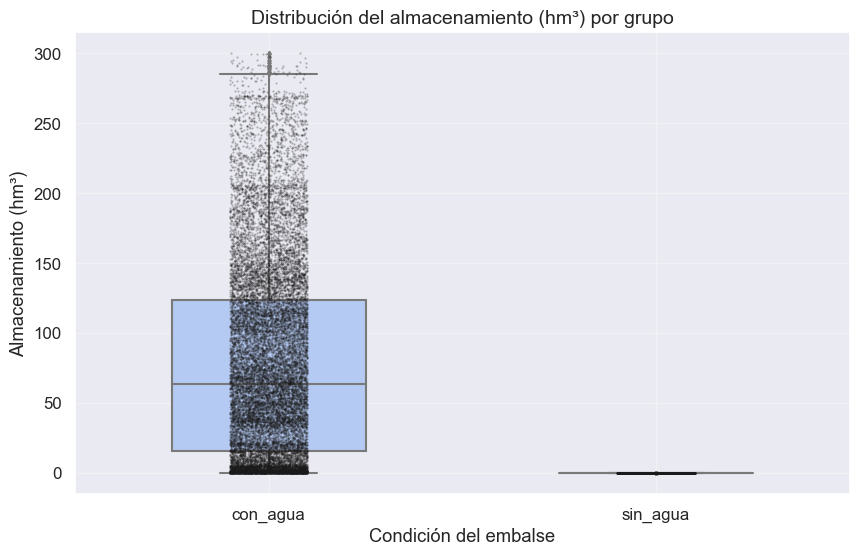

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grupo', y='hm3', data=df, palette='coolwarm', width=0.5, fliersize=2)
sns.stripplot(x='grupo', y='hm3', data=df, color='k', alpha=0.3, size=1.5, jitter=True)
plt.title('Distribución del almacenamiento (hm³) por grupo', fontsize=14)
plt.ylabel('Almacenamiento (hm³)')
plt.xlabel('Condición del embalse')
plt.grid(alpha=0.3)
plt.show()

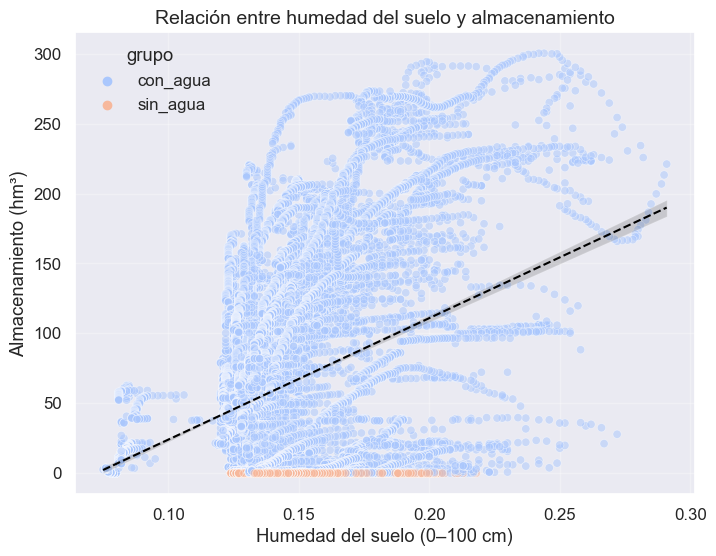

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x='soil_moisture_0_to_100cm_mean', y='hm3', hue='grupo',
    palette='coolwarm', alpha=0.5
)
sns.regplot(
    data=df, x='soil_moisture_0_to_100cm_mean', y='hm3',
    scatter=False, color='black', line_kws={'lw':1.5, 'ls':'--'}
)
plt.title('Relación entre humedad del suelo y almacenamiento', fontsize=14)
plt.xlabel('Humedad del suelo (0–100 cm)')
plt.ylabel('Almacenamiento (hm³)')
plt.grid(alpha=0.3)
plt.show()


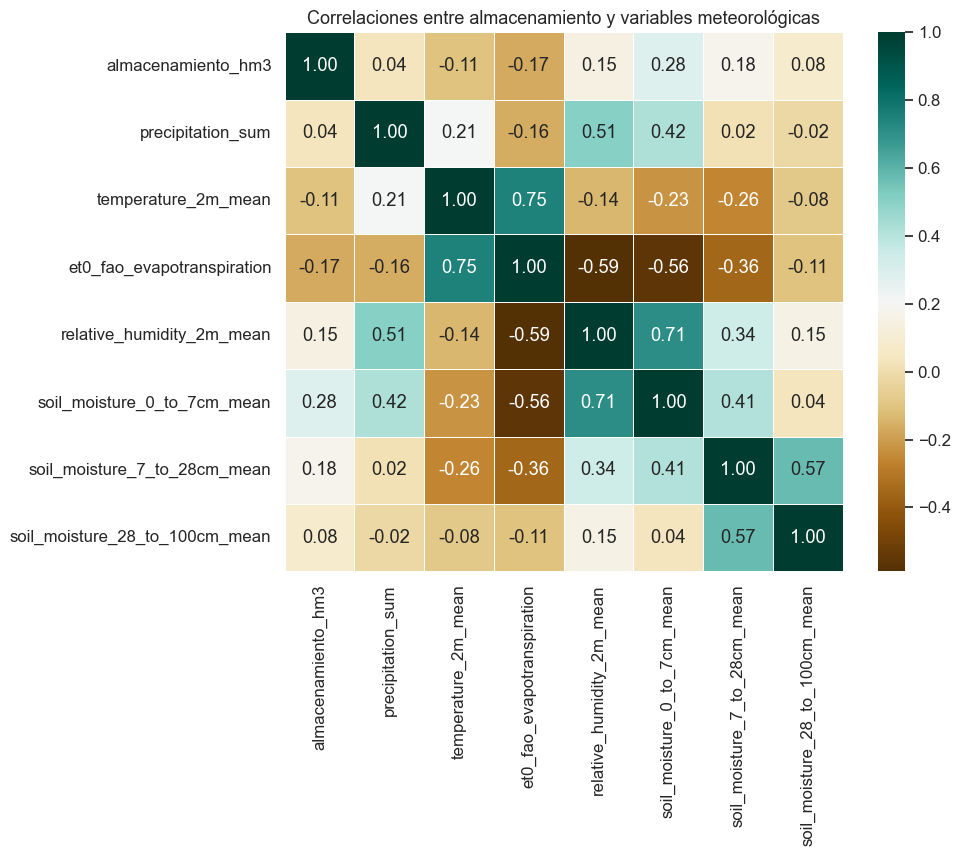

In [7]:
cols_interes = [
    'almacenamiento_hm3', 'precipitation_sum', 'temperature_2m_mean',
    'et0_fao_evapotranspiration', 'relative_humidity_2m_mean',
    'soil_moisture_0_to_7cm_mean', 'soil_moisture_7_to_28cm_mean',
    'soil_moisture_28_to_100cm_mean'
]
corr = df[cols_interes].corr(method='spearman')

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones entre almacenamiento y variables meteorológicas', fontsize=13)
plt.show()


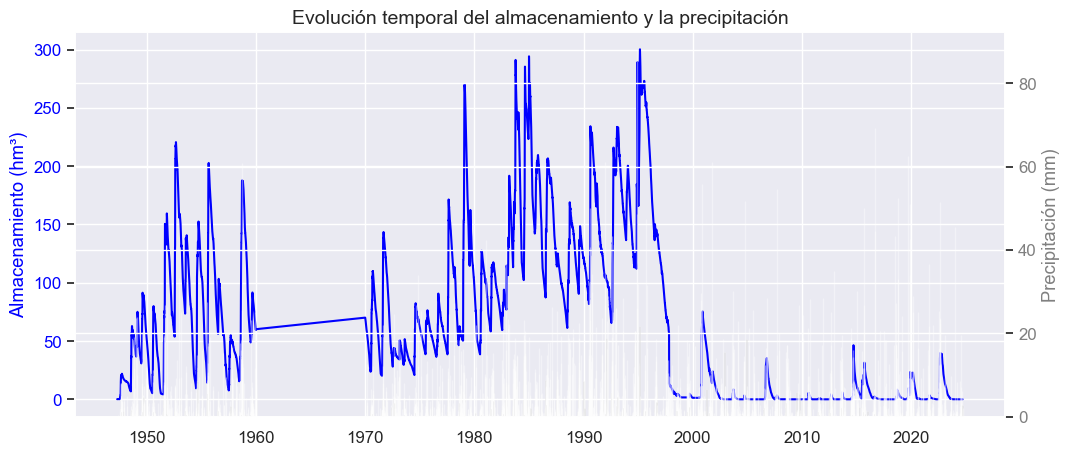

In [8]:
df['fecha'] = pd.to_datetime(df['fecha'])
df_sorted = df.sort_values('fecha')

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df_sorted['fecha'], df_sorted['almacenamiento_hm3'], color='blue', label='Almacenamiento (hm³)')
ax1.set_ylabel('Almacenamiento (hm³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(df_sorted['fecha'], df_sorted['precipitation_sum'], color='gray', alpha=0.4, label='Precipitación (mm)')
ax2.set_ylabel('Precipitación (mm)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Evolución temporal del almacenamiento y la precipitación', fontsize=14)
plt.show()


c:\Users\him_6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


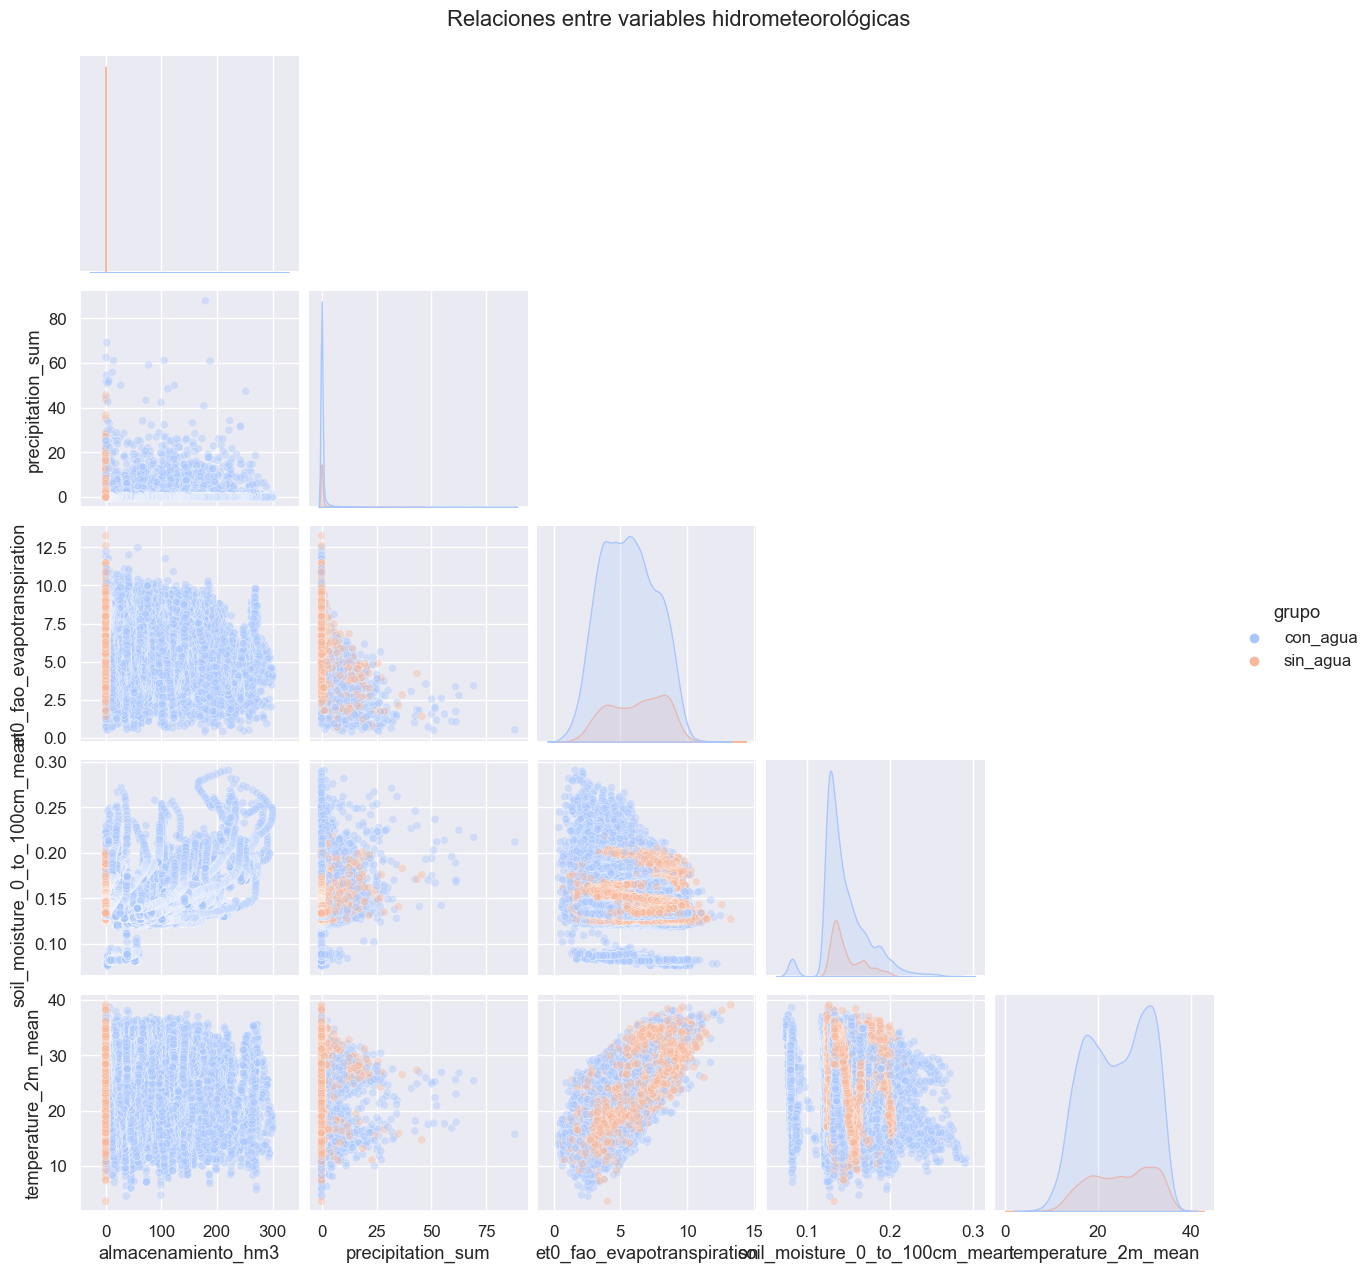

In [9]:
sns.pairplot(
    df[['almacenamiento_hm3', 'precipitation_sum', 'et0_fao_evapotranspiration',
        'soil_moisture_0_to_100cm_mean', 'temperature_2m_mean', 'grupo']],
    hue='grupo', palette='coolwarm', corner=True, plot_kws={'alpha':0.4}
)
plt.suptitle('Relaciones entre variables hidrometeorológicas', y=1.02)
plt.show()


c:\Users\him_6\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


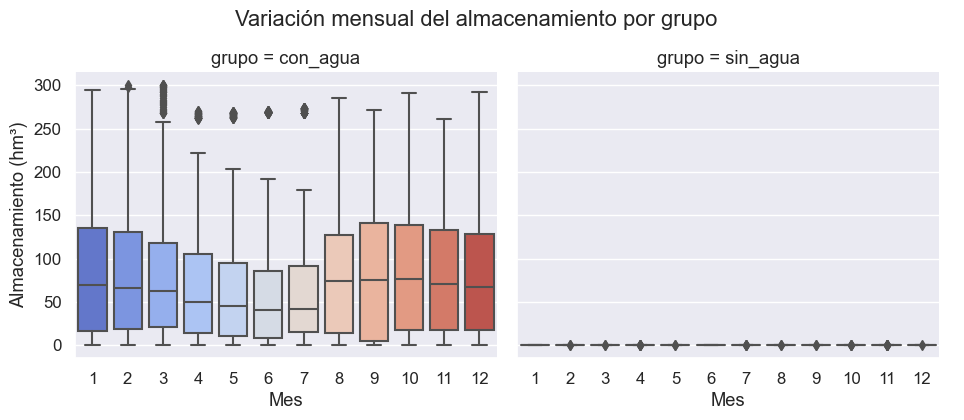

In [10]:
df['mes'] = df['fecha'].dt.month
sns.FacetGrid(df, col='grupo', height=4, aspect=1.2).map_dataframe(
    sns.boxplot, x='mes', y='hm3', palette='coolwarm'
).set_axis_labels("Mes", "Almacenamiento (hm³)").add_legend()
plt.suptitle('Variación mensual del almacenamiento por grupo', y=1.05)
plt.show()


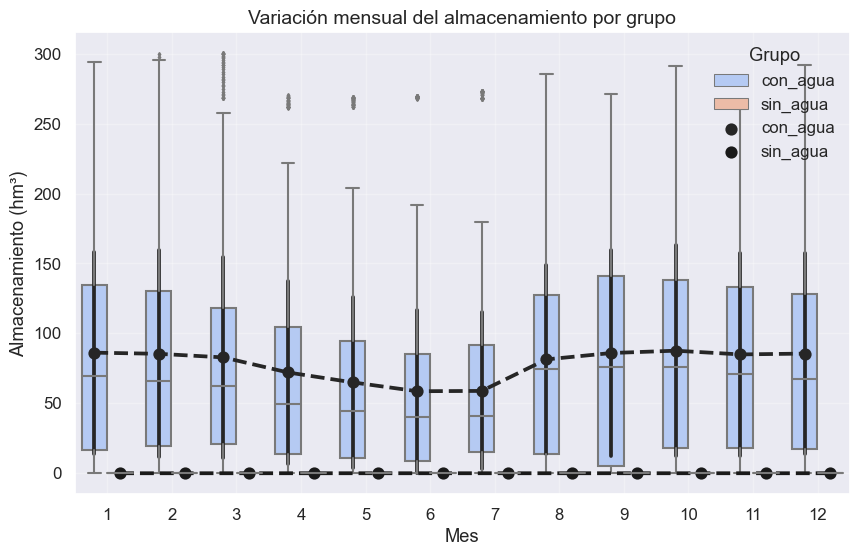

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='mes', y='hm3', hue='grupo', data=df, palette='coolwarm', fliersize=2)
sns.pointplot(
    data=df, x='mes', y='hm3', hue='grupo',
    dodge=0.4, palette='dark:k', markers='o', linestyles='--', errorbar='sd'
)
plt.title('Variación mensual del almacenamiento por grupo', fontsize=14)
plt.ylabel('Almacenamiento (hm³)')
plt.xlabel('Mes')
plt.grid(alpha=0.3)
plt.legend(title='Grupo')
plt.show()


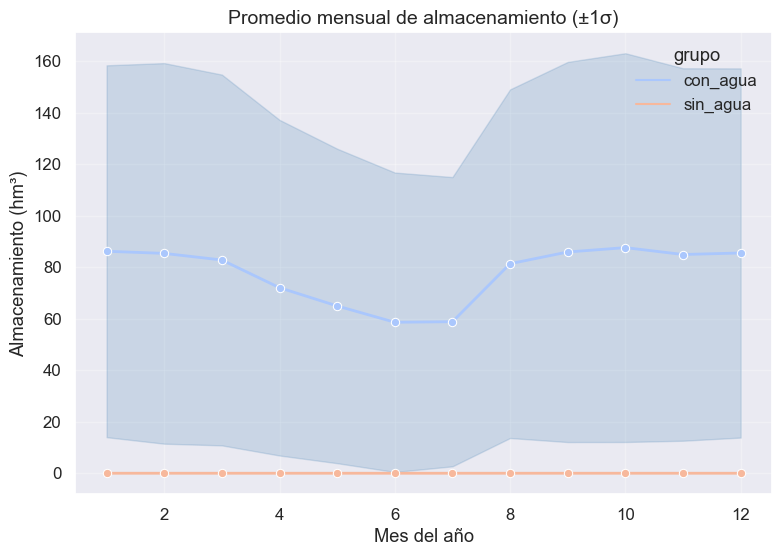

In [12]:
df_mes = df.groupby(['mes','grupo'])['hm3'].agg(['mean','std']).reset_index()

plt.figure(figsize=(9,6))
sns.lineplot(
    data=df_mes, x='mes', y='mean', hue='grupo',
    palette='coolwarm', marker='o', linewidth=2
)
plt.fill_between(
    df_mes[df_mes['grupo']=='con_agua']['mes'],
    df_mes[df_mes['grupo']=='con_agua']['mean'] - df_mes[df_mes['grupo']=='con_agua']['std'],
    df_mes[df_mes['grupo']=='con_agua']['mean'] + df_mes[df_mes['grupo']=='con_agua']['std'],
    alpha=0.2, color='steelblue'
)
plt.title('Promedio mensual de almacenamiento (±1σ)', fontsize=14)
plt.ylabel('Almacenamiento (hm³)')
plt.xlabel('Mes del año')
plt.grid(alpha=0.3)
plt.show()


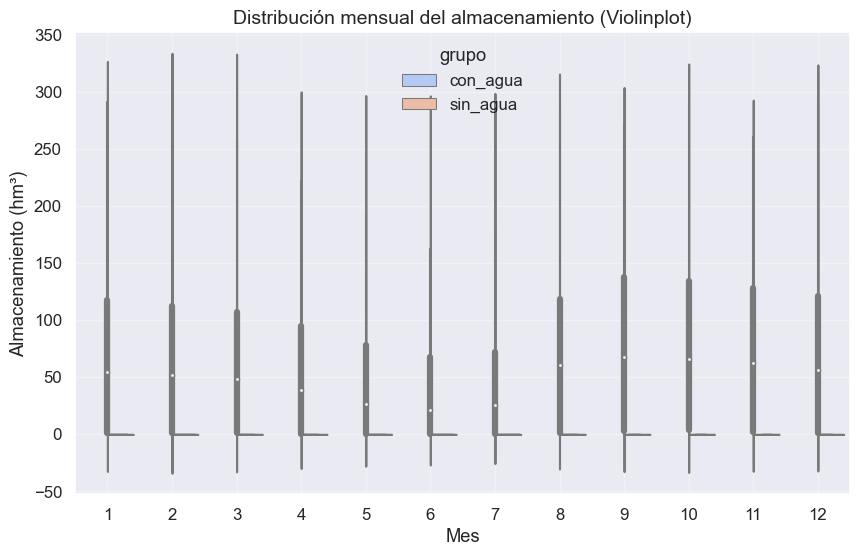

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x='mes', y='hm3', hue='grupo', data=df, split=True, palette='coolwarm')
plt.title('Distribución mensual del almacenamiento (Violinplot)', fontsize=14)
plt.ylabel('Almacenamiento (hm³)')
plt.xlabel('Mes')
plt.grid(alpha=0.3)
plt.show()


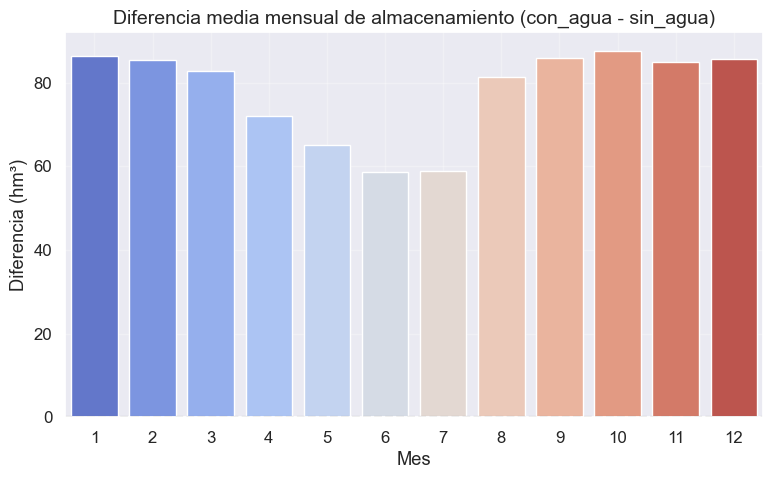

In [14]:
diff = (
    df.groupby(['mes','grupo'])['hm3'].mean().unstack()
)
diff['diferencia'] = diff['con_agua'] - diff['sin_agua']

plt.figure(figsize=(9,5))
sns.barplot(x=diff.index, y='diferencia', data=diff.reset_index(), palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferencia media mensual de almacenamiento (con_agua - sin_agua)', fontsize=14)
plt.ylabel('Diferencia (hm³)')
plt.xlabel('Mes')
plt.grid(alpha=0.3)
plt.show()
